## Analyzing overlaps of isotopic envelopes

Calculate theoretical spectra of lipids annotated using both techniques:

In [55]:
spectra_from_average = {}  
spectra_from_whole = {} 
for n in names:
    spectra_from_average[n] = [Spectrum(formula=f, threshold=0.05, adduct='K') for f in average_spectrum_annotation[n]]
    spectra_from_whole[n] = [Spectrum(formula=f, threshold=0.05, adduct='K') for f in whole_image_annotation[n]]

Get the monoisotopic masses and all masses:

We'll use only the whole-image annotation.  

In [56]:
mono = {}  # monoisotopic peaks 
iso = {}  # isotopic peaks (non-mono)
for n in names:
    mono[n] = [s.confs[0][0] for s in spectra_from_whole[n]]
    mono[n].sort()
    iso[n] = [cf[0] for s in spectra_from_whole[n] for cf in s.confs[1:]]
    iso[n].sort()

Calculate the numbers of monoisotopic peaks that are interfered by other isotopic envelopes, for different ppm accuracy values.  

Since the monoisotopic peak is "singular" (it has no fine structure), it means that if its close to any other peak, then the other peak has to be from some other ion, i.e. its an interference. So we can just calculate the numbers of close peaks, without looking which lipid they're from.    

In [57]:
ppm_array = np.linspace(10, 201, num=1001)
nb_overlaps = {n: np.zeros(ppm_array.shape) for n in names}  
for n in names:
    cid = 0  # id of the current monoisotopic mass in the all_peaks vector
    # note: we don't need to check the first mass, 
    # because it can't be interfered by any lighter ion
    for mmass in mono[n][1:]:  
        while iso[n][cid] < mmass:
            cid += 1
            # note: cid will never exceed len(all_peaks_from_whole[n][cid])
            # because monoisotopic masses are within their envelopes
        assert iso[n][cid] > mmass and iso[n][cid-1] < mmass
        if iso[n][cid] - mmass > iso[n][cid-1] - mmass:
            closest_mass = iso[n][cid-1] 
        else:
            closest_mass = iso[n][cid] 
        ppm_diff = 1e6*abs((closest_mass-mmass))/mmass
        ppm_id = np.searchsorted(ppm_array, ppm_diff)
        nb_overlaps[n][ppm_id:] += 1

<IPython.core.display.Javascript object>


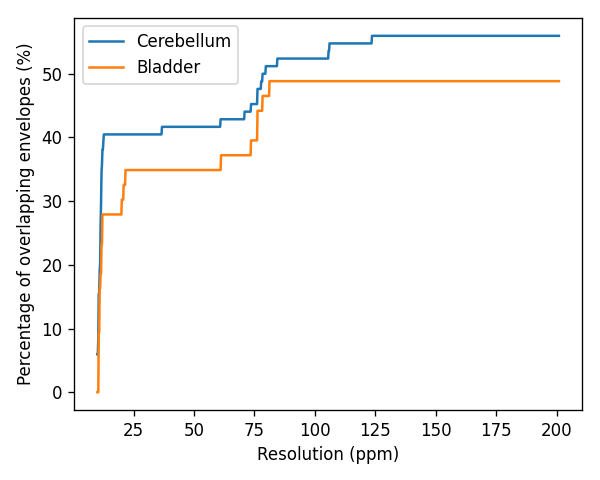

In [58]:
plt.figure(figsize=(5,4), dpi=100)
plt.plot(ppm_array, 100*nb_overlaps['cerebellum']/len(mono['cerebellum']))
plt.plot(ppm_array, 100*nb_overlaps['bladder']/len(mono['bladder']))
plt.legend(['Cerebellum', 'Bladder'])
plt.ylabel('Percentage of overlapping envelopes (%)')
plt.xlabel('Resolution (ppm)')
plt.tight_layout()

## Examples of highly overlapping lipids

In [59]:
ppm_threshold = 11

In [60]:
overlapping_monos = {n: [m for m in mono[n] if any(1e06*abs(ipk - m)/m < ppm_threshold for ipk in iso[n])] for n in names}

In [61]:
overlapping_spectra = {n: [s for s in spectra_from_whole[n] if s.confs[0][0] in overlapping_monos[n]] for n in names}

In [62]:
overlapping_spectra

{'cerebellum': [<masserstein.spectrum.Spectrum at 0x7f4108ab7eb0>,
 'bladder': [<masserstein.spectrum.Spectrum at 0x7f41072a8040>,
  <masserstein.spectrum.Spectrum at 0x7f41072a9db0>]}

In [63]:
overlapping_monos['cerebellum']

[757.55134851141,
 783.56699857595,
 796.525862039,
 811.59829870503,
 813.4836628734499,
 814.5364267237401,
 822.5415121035401,
 824.55716216808,
 826.57281223262,
 846.52625596414,
 846.5415121035401,
 848.55716216808,
 851.64083222231,
 853.65648228685,
 854.6041123617,
 856.58337691736,
 866.64874008011,
 872.55716216808]

<IPython.core.display.Javascript object>


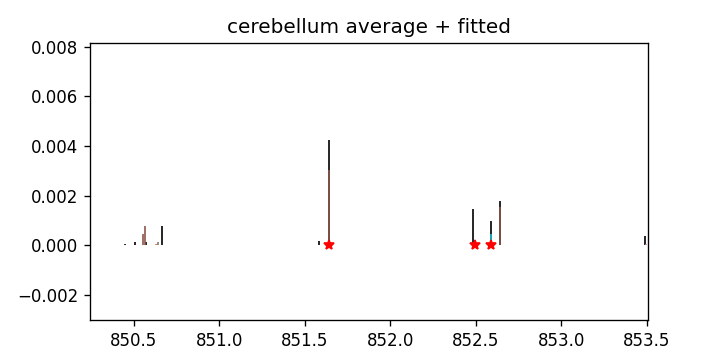

<IPython.core.display.Javascript object>


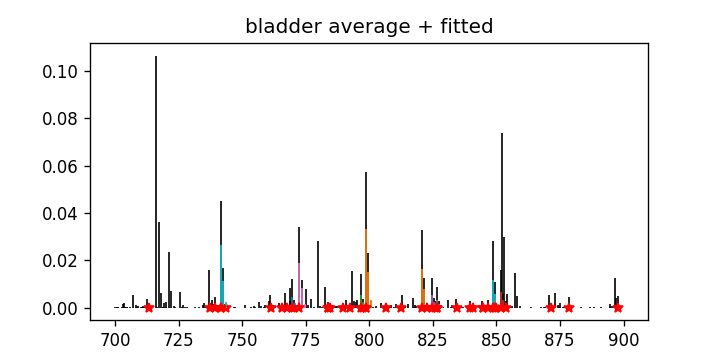

In [65]:
for i, n in enumerate(names):
    plt.figure(figsize=(6,3))
    plt.title(n + ' average + fitted')
    average_spectra[i].plot(profile=False, color='k', show=False)
    for l_id, s in enumerate(spectra_from_whole[n]):
        p = whole_image_annotation[n][s.formula]
        (s*p).plot(color=cm.tab10(l_id%10), show=False)
        plt.plot(s.confs[0][0], [0], 'r*')
    plt.show()

In [53]:
s.formula

'C48H91O10P'